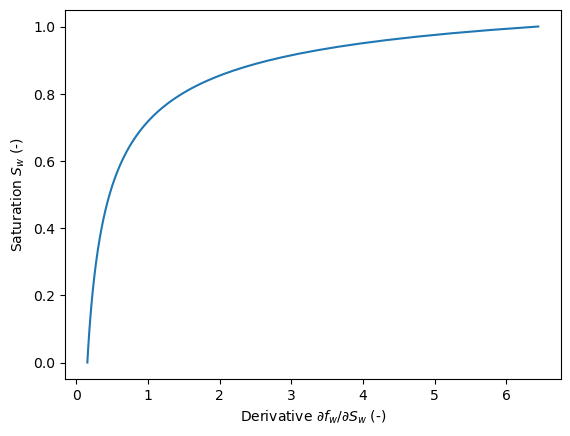

In [1]:
import matplotlib.pyplot as plt
from linearmodell import fractionalflow
Sw, fw, dfwdx = fractionalflow()

plt.plot(dfwdx, Sw)
plt.xlabel("Derivative $\partial f_w / \partial S_w$ (-)")
plt.ylabel("Saturation $S_w$ (-)")
plt.show()

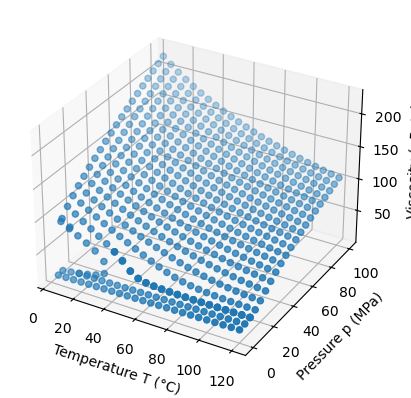

In [2]:
import properties

mun = properties.from_table("Viscosity (uPa*s)", path2excel="Properties_CO2.xlsx", sheet_name="table2")

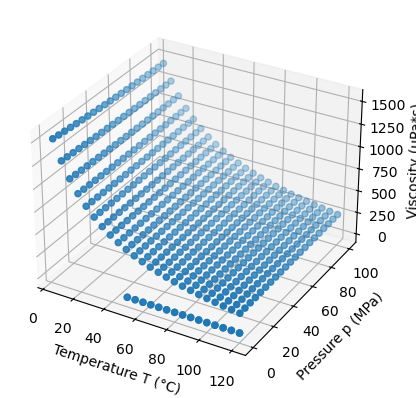

In [3]:
muw = properties.from_table("Viscosity (uPa*s)", path2excel="Properties_H2O.xlsx", sheet_name="table1")

In [4]:
from numpy import array, meshgrid, zeros
import pandas as pd

z = 2000
rho = array([1100, 1200, 1300])
dT = array([2.0, 2.5, 3.0])

p = rho * 9.81 * z / 1e6
T = dT / 100 * z + 10

np = rho.size
nT = dT.size

vel = list()
rhov = list()
dTv = list()

for i in range(np):
    for j in range(nT):
        mun_ = mun(p[i], T[j])
        muw_ = muw(p[i], T[j])
        Sw, fw, dfwdx = fractionalflow(muw = muw_, mun = mun_)
        
        vel.append(dfwdx[-1])
        rhov.append(rho[i])
        dTv.append(dT[j])

df = pd.DataFrame({"MaxVelocity": vel,
                   "Density": rhov,
                   "ThermalGradient": dTv,
                   "Density_": (rhov-min(rhov))/(max(rhov)-min(rhov)),
                   "ThermalGradient_": (dTv-min(dTv))/(max(dTv)-min(dTv))})

print(df)

   MaxVelocity  Density  ThermalGradient  Density_  ThermalGradient_
0     7.619381     1100              2.0       0.0               0.0
1     7.418538     1100              2.5       0.0               0.5
2     7.343169     1100              3.0       0.0               1.0
3     7.268555     1200              2.0       0.5               0.0
4     7.006265     1200              2.5       0.5               0.5
5     6.855981     1200              3.0       0.5               1.0
6     6.962598     1300              2.0       1.0               0.0
7     6.656316     1300              2.5       1.0               0.5
8     6.453312     1300              3.0       1.0               1.0


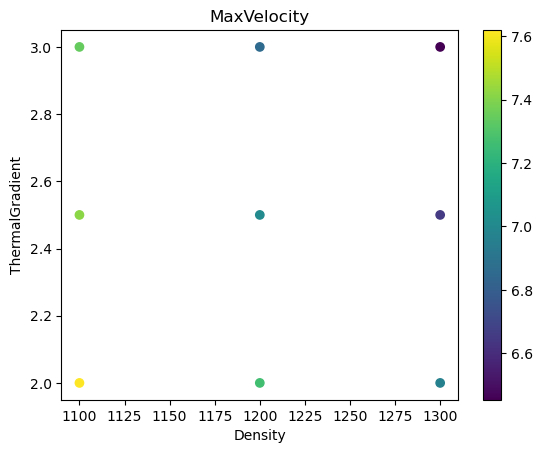

In [6]:
scatter = plt.scatter(df['Density'], df['ThermalGradient'], c=df['MaxVelocity'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Density')
plt.ylabel('ThermalGradient')
plt.title('MaxVelocity')
plt.show()

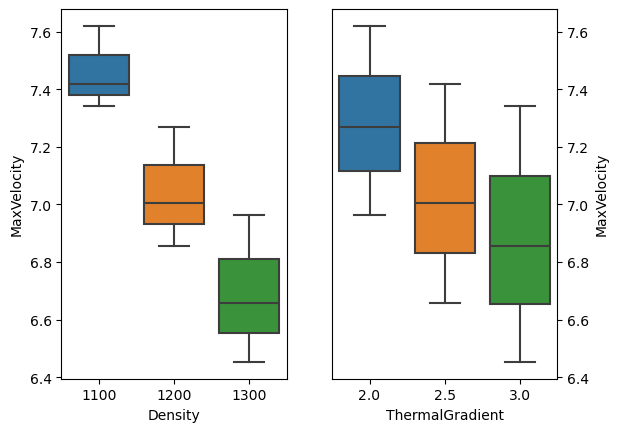

In [7]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.boxplot(x="Density", y="MaxVelocity", data=df, ax=ax1)
sns.boxplot(x="ThermalGradient", y="MaxVelocity", data=df,  ax=ax2)

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.show()

The effect of the fluid density on the flow velocity is stronger than the effect of the thermal gradient.

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MaxVelocity ~ Density_ + ThermalGradient_ + Density_:ThermalGradient_', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MaxVelocity   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     219.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.00e-05
Time:                        18:02:49   Log-Likelihood:                 18.485
No. Observations:                   9   AIC:                            -28.97
Df Residuals:                       5   BIC:                            -28.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

c:\Users\jante\Anaconda3\envs\python_3.11\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
